# Assignmnet 1 (Part A): Simple Linear Regression 

### About the dataset:

This assignment uses the **Student Performance Factors** dataset.  
It provides information on students’ exam scores and a variety of academic, behavioral, and socio-economic factors.

- **Dependent variable:**  
  - `Exam_Score`: Final exam score (0–100).  

- **Key independent variables:**  
  - `Hours_Studied`, `Attendance`, `Sleep_Hours`, `Previous_Scores`, `Tutoring_Sessions`.  

- **Background (categorical) variables:**  
  - `Parental_Education_Level`, `Family_Income`, `Access_to_Resources`, `Parental_Involvement`,  
    `Teacher_Quality`, `Motivation_Level`, `School_Type`, `Peer_Influence`, `Internet_Access`,  
    `Extracurricular_Activities`.  


### Questions we are going  to answer:
 

1. **Does studying more improve exam results? Do these results differ across groups?**  
   We run a **simple linear regression** of Exam Score on Hours Studied for each group.  
   - Question: *Is the impact of studying stronger for High Support or Low Support students?*  


2. **Do the regression assumptions hold?**  
   We test the four classical OLS assumptions:  
   - Linearity of mean function  
   - Independence of errors  
   - Homoskedasticity  
   - Normality of errors  
---

By working through these tasks, you will:  

- Practice **data cleaning, filtering, and sampling**.  
- Learn to run and interpret **simple linear regressions**.  
- Apply **diagnostic tests** to validate model assumptions.  


This structure mirrors the type of questions asked in **real-world data analysis projects**.



We are interested in comparing students in different **support environments**.

A student’s support level is defined by:  
1. **Access to Resources** (High vs Low)  
2. **Family Income** (High vs Low)  
3. **Parental Education Level** (Postgraduate/College vs High School)  

- **High Support group** = Access=High, Income=High, Parent Edu=Postgraduate/College  
- **Low Support group** = Access=Low, Income=Low, Parent Edu=High School


### Task 0: General Information of the Data

  
<h4 style="color:blue">Please complete the codes below:</h4> 

In [23]:
#============= Setup:  

#------import packages

from ISLP.models import (ModelSpec as MS, summarize, poly)

# ------ please also import os, numpy,  pandas,  matplotlib.pyplot, statsmodels.api here:  
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

#------Set Working Directory (use os.chdir()): 
os.chdir('/Users/erminaashraf/Downloads/Assignment_1(401)');

#---- load data (name it as "StudentData"): 
StudentData = pd.read_csv("StudentPerformanceFactors.csv")

In [36]:
#======== inspect the data: 

#----- Please identify the size of the data, name of variables and total missing entires 
StudentData_size = StudentData.shape

StudentData_vars = StudentData.columns

null_data_count =  StudentData.isnull().values.sum()


#------  print results 
print('size of StudentData.csv data is:', StudentData_size)

print('variables in StudentData.csv data are:\n',StudentData_vars)

print('StudentData.csv has', null_data_count, 'missing vlaue in total')

size of StudentData.csv data is: (6607, 20)
variables in StudentData.csv data are:
 Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')
StudentData.csv has 235 missing vlaue in total


In [25]:
##============== drop the missing values

#------drop all missing values and rename the data as StudentData_new

StudentData_new = StudentData.dropna()
StudentData_new

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


### Task 1: Extracting Groups and Sampling

1. Extract the **High Support** and **Low Support** groups using `.loc[lambda …]`.  
2. Report group sizes.  
3. Randomly select **150 students** from each group (use seed=42).  

  
<h4 style="color:blue">Please complete the codes below:</h4> 

In [26]:
#======= Extract two data sets 
 
#------------- extract the High/Low Support group from StudentData_new using loc[lambda]: 
high_support = StudentData_new.loc[lambda df: (df["Access_to_Resources"] == "High") 
                                            & (df["Family_Income"] == "High") 
                                            &  (df["Parental_Education_Level"].isin(["Postgraduate", "College"]))]


low_support = StudentData_new.loc[lambda df:(df["Access_to_Resources"] == "Low") 
                                            & (df["Family_Income"] == "Low") 
                                            & (df["Parental_Education_Level"] == "High School")]


#---------------  Report group sizes
print("High Support group size:", len(high_support))
print("Low Support group size:", len(low_support))


#--------------- Randomly sample 150 students from each group
high_sample = high_support.sample(n = 150, random_state = 42)
low_sample = low_support.sample(n = 150, random_state = 42)

#------------- Display first 5 rows of each sample 
print("High Support Sample:")
display(high_sample.head(5))

print("Low Support Sample:")
display(low_sample.head(5))

High Support group size: 171
Low Support group size: 272
High Support Sample:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
3667,24,77,High,High,Yes,7,88,Low,Yes,1,High,Medium,Public,Negative,5,No,College,Near,Male,71
2172,18,64,High,High,No,8,69,Medium,Yes,3,High,Medium,Public,Positive,3,No,College,Moderate,Male,66
2214,17,76,Medium,High,Yes,6,70,Low,Yes,2,High,Medium,Public,Neutral,4,No,Postgraduate,Moderate,Male,67
5301,18,62,Medium,High,Yes,6,89,Medium,Yes,0,High,High,Private,Positive,3,No,Postgraduate,Near,Female,66
6049,15,74,Medium,High,No,6,80,Medium,Yes,2,High,Medium,Public,Negative,3,No,Postgraduate,Moderate,Male,66


Low Support Sample:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
772,24,91,Low,Low,Yes,7,66,High,Yes,2,Low,High,Public,Neutral,3,No,High School,Near,Male,69
2759,24,94,High,Low,Yes,8,80,High,No,1,Low,Medium,Public,Neutral,4,No,High School,Near,Female,70
1948,27,74,Medium,Low,Yes,9,64,High,No,1,Low,Medium,Public,Neutral,3,No,High School,Near,Male,65
3002,18,86,Low,Low,Yes,9,64,Low,Yes,3,Low,High,Public,Positive,3,No,High School,Near,Female,66
4785,18,89,Medium,Low,No,8,76,High,Yes,0,Low,Medium,Public,Positive,2,No,High School,Near,Male,67


#### Question 1.1 <h4 style="color:blue">(Write your answer here)</h4>

Do you think the chosen split criterion for distinguishing between high support and low support is appropriate for addressing the question? Please explain your reasoning.

1. *Agree* – explain why   
2. *Disagree* – explain why   
3. *Partially agree* – explain in what ways the split is useful, and in what ways it may be limited.  


We partially agree. The three variables (access to ressources, family income, and parental education) are a decent starting point because they usually line up with how much support a student has at home.

However, in real life, support isn't just about the student's household's socio-economic status (SES). In this dataset, things at school matter too, like Teacher_Quality, School_Type, and Peer_Influence, and there are direct supports such as Parental_Involvement, Tutoring_Sessions, and Internet_Access. If we ignore those, we risk labeling “support” too narrowly.

Another issue is that the three SES variables are correlated, so using just those can end up double-counting the same underlying thing. On top of that, differences in outcomes might come from prior performance or habits, not support itself. 

#### Question 1.2 <h4 style="color:blue">(Write your answer here)</h4>

What alternative criterion (or combination of factors)  
would you use to distinguish the high/low support groups? Please justify your choice.

Use something like a Support Score. 

We would give 1 point for a student with:

**Home:**
- "Family_Income" = High
- "Access_to_Resources" = High, 
- "Parental_Education_Level" = College or Post Graduate. 

**School/peers:** 
- "Teacher_Quality" = High, 
- "School_Type" = Private, 
- "Peer_Influence" = Positive. 

**Direct Help:** 
- "Parental_Involvement" = High, 
- "Tutoring_Sessions" > 0 
- "Internet_Access" = Yes. 

Add the points up.
**The top 30% of scores = High Support, and the bottom 30% = Low Support.**

We think this is a good alternative as it treats support more than just money at home, it is more transparent, and avoids double-counting SES by forcing us to look at school and direct help too. 

### Task 2: Simple Linear Regression


For each group (150 students each), run a **simple linear regression** where:  
- Dependent variable (**Y**) = **Exam_Score**  
- Independent variable (**X**) = **Hours_Studied**  

#### Question 2.1: Please write down the regression model <h4 style="color:blue">(Write your answer here)</h4>





Exam_Score = $β0 + β1($Hours_Studied$_i)$ + $ε_i$

$Y = β0 + β1 * X_i + ε_i$

Using `sm.OLS` as in class, do: 

1. Report the **regression coefficient**, **R²**, and **p-value** for each group.  
2. Compare the results between High Support and Low Support groups:  
   - Which group shows a stronger relationship between study hours and exam scores?  
   - How much variation in exam scores does study effort explain in each group?  

 <h4 style="color:blue">Please complete the codes below:</h4> 

In [27]:
#============= simple linear regression for high Support Group: 

#------ extract the predictors: 
X_high = pd.DataFrame({'intercept': np.ones(high_sample.shape[0]),  
                  'Hours_Studied':high_sample["Hours_Studied"]
                      })

#------ extract the response: 
y_high = high_sample["Exam_Score"]    #-----this is our Y variable

#----- Specify the model: we tell Python that we are going to use OLS using the Y and X
model_high = sm.OLS(y_high, X_high) 
results_high = model_high.fit()


#------We check the results: 
display(summarize(results_high)) 
print("R²:", results_high.rsquared)
 

,coef,std err,t,P>|t|
intercept,64.0538,0.995,64.393,0.0
Hours_Studied,0.2526,0.046,5.484,0.0


R²: 0.16890232856980758


In [28]:
#============= simple linear regression for low Support Group: 

X_low = pd.DataFrame({'intercept': np.ones(low_sample.shape[0]),
                  'Hours_Studied':low_sample["Hours_Studied"]
                      })

#------ We extract the response: 
y_low = low_sample["Exam_Score"]    #-----this is our Y variable

#----- Specify the model: we tell Python that we are going to use OLS using the Y and X
model_low = sm.OLS(y_low, X_low) 
results_low = model_low.fit()


#------We check the results: 
display(summarize(results_low)) 
print("R²:", results_low.rsquared)

,coef,std err,t,P>|t|
intercept,57.8341,0.949,60.958,0.0
Hours_Studied,0.3991,0.046,8.743,0.0


R²: 0.3405973085640497


### Task 3: Testing Regression Assumptions (High Support Group)

For the `High Support sample` (150 students), test the four key assumptions of the simple linear regression model:

1. **Linearity of the mean function**  
   $
   E[Y_i \mid X_i=x] = \beta_0 + \beta_1 x
   $  
   ➝ Check with a **residuals vs fitted values plot**.  

2. **Independence of errors**  
   $
   \text{Cov}(\epsilon_i, \epsilon_j) = 0 \quad (i \neq j)
   $ 
   ➝ Use the **Durbin–Watson statistic** 

3. **Homoskedasticity (constant variance of errors)**  
   $
   Var(\epsilon_i \mid X_i) = \sigma^2
   $ 
   ➝ Use **White’s Test**.  

4. **Normality of errors**  
   $
   \epsilon_i \mid X_i \sim N(0, \sigma^2)
   $  
   ➝ Use the **Shapiro–Wilk Test** and a **QQ-plot**.


   <h4 style="color:blue">(Please complete the code)</h4>

In [29]:
#============= import packages/functions
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro
import statsmodels.graphics.gofplots as smg

Text(0.5, 1.0, 'Residuals vs Fitted (Linearity Check)')

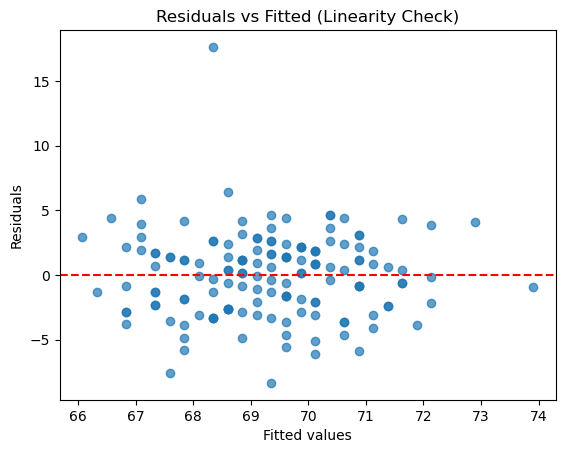

In [30]:
#============= Linearity of the mean function: residuals vs fitted values plot  

#----- Extract data 
residuals_high = results_high.resid
fitted_high = results_high.fittedvalues

#----- Plot:  
plt.scatter(fitted_high, residuals_high, alpha=0.7)
plt.axhline(0, color="red", linestyle="--")

plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Linearity Check)")
 

#### Question 3.1 (Write your answer here)

Do you think the **linearity assumption** is satisfied in this regression?  
Please explain your reasoning based on the residuals vs fitted values plot.


<h4 style="color:blue">(Write your answer here)</h4>



**Yes, the linearity assumption looks reasonably satisfied. The residuals bounce around the 0 line with no clear curve or systematic pattern across fitted values (66 to 74). There's one large positive outlier near fitted ~ 69 and a slightly wider spread in the middle than at the edges.**

In [31]:
# ========== Independence of errors: Durbin–Watson
dw = durbin_watson(residuals_high)
dw

np.float64(2.1939572311497475)

#### Question 3.2 (Write your answer here)

Do you think the **Independence of errors** is satisfied in this regression?  
Please explain your reasoning based on the Durbin–Watson.


<h4 style="color:blue">(Write your answer here)</h4>

Durbin-Watson = 2.194 

**Slightly negative autocorrelation. But since 2.194 is very close to 2, we can say the independance assumption looks fine.**

In [32]:
# ========== Homoskedasticity: White's Test 
exog_high = results_high.model.exog
white_test_high = het_white(results_high.resid, exog_high)

labels = ["LM Stat", "LM p-value", "F-Stat", "F p-value"]
print("\nWhite's Test for Heteroskedasticity:")
for name, val in zip(labels, white_test_high):
    print(f"{name}: {val:.4f}")


White's Test for Heteroskedasticity:
LM Stat: 0.8178
LM p-value: 0.6644
F-Stat: 0.4029
F p-value: 0.6691


#### Question 3.3 (Write your answer here)

Do you think the **Homoskedasticity** is satisfied in this regression?  
Please explain your reasoning based on the White's Test 


<h4 style="color:blue">(Write your answer here)</h4>

**Yes. White’s test gives LM = 0.818 (p = 0.664) and F = 0.403 (p = 0.669). With p-values far above 0.05, we fail to reject homoskedasticity, which means the variance of the residuals is constant across levels of X and the spread of the residuals does not change as X changes.**


Shapiro–Wilk Test: statistic=0.9412606589938542, p-value=6.584197691350876e-06


Text(0.5, 1.0, 'QQ Plot of Residuals (Normality Check)')

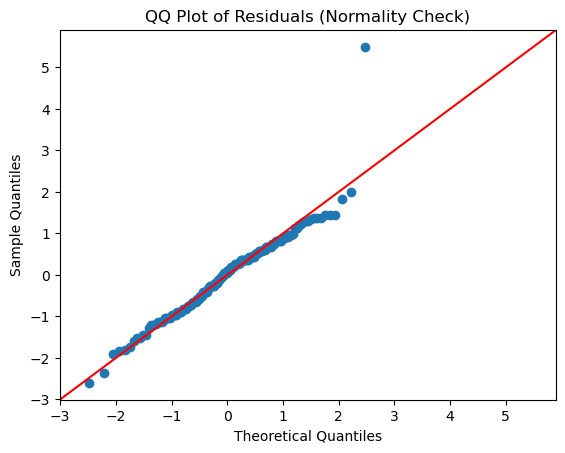

In [33]:
# ========== Normality of errors: Shapiro–Wilk Test and QQ plot ---
shapiro_test = shapiro(results_high.resid)
print(f"\nShapiro–Wilk Test: statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

#---- QQplot
smg.qqplot(results_high.resid, line="45", fit=True)
plt.title("QQ Plot of Residuals (Normality Check)")

#### Question 3.4 (Write your answer here)

Do you think the **Normality of errors** is satisfied in this regression?  
Please explain your reasoning based on the shapiro_test.


<h4 style="color:blue">(Write your answer here)</h4>

**No. The $W$ is 0.941, which is close to 1, it suggests good normality. The p-value (6.58×10⁻⁶) is < 0.05, so we reject $H_0$ (normality assumption).**

### Interpretation and Reflection:

After completing your analysis, please answer the following:

1. **What is your answer to the research question?**  
   - Do students with *high support* or *low support* appear to gain more from studying additional hours?

Students with **low support** appear to gain more from studying additional hours.

2. **Does the analysis support your answer?**   
   - You may use the results to justify your reasoning.
     
- We can see from the slope, both have positive slopes; the high support group is 0.253, and the low support group is 0.399, which means the low support group gains more points for each additional hour of study.
  
- From the variance, the high support group is 0.169, the low support group is 0.341, which means study hours explain 34.1% of score variation in the low support group and explain 16.9% of score variation in the high support group.


- To verify the model assumptions:
    - The overall linearity is reasonable since the residuals are scattered around 0, which is consistent with the linear mean.

    -  The $DW$ is 2.194, which shows a slightly negative autocorrelation, but there is no concern since it is close to 2.

    - From the $White's Test$, we fail to reject the homoskedasticity, which means the variance of the residuals is constant across levels of X and the spread of the residuals does not change as X changes.

    - From the QQ plot of residuals, there is good normality, but the p-value is too small, so we reject the $H_0$.<s>


3. **What factors could harm the validity of your answer?**  
   - Hint: Potential limitations could be:  
     - Correlation vs. causation (we are not proving causality).  
     - Measurement error or omitted variables (e.g., motivation, prior ability).  
     - etc.

- In our model, the "study hours" is the only predictor. The correlation between study hours and high score does not mean that higher study hours will result in a higher score. **Correlation is not causation!**
  
- There could be other factors than just study hours. Our model only takes the true effect of study hours and the unobserved effect of other factors that move along with study hours.

- We only focus on the extreme groups (no medium was taken) could lead to selection bias and reduce the generalizability of the model. There may be higher variance, and the model may be more sensitive to the outliers.

- The Low/High ratings are subjective and may vary across people, and they could lead to misclassification and measurement error in the data.
       
<h4 style="color:blue">(Write your answer here)</h4>

# Part(B): Multiple Linear Regression

## Task 1: Append the data
1. Create a new dataset 'combine_df' by appending high_sample to low_sample. 
2. Within 'combine_df', create a new variable 'support_index'. If a student is from high_sample, 'support_index=1'; otherwise 'support_index=0' 

In [34]:
#----- combine data:  (hint pd.concat)  

combine_df = pd.concat([high_sample.assign(support_index=1), low_sample.assign(support_index=0)])
print(combine_df.shape)
combine_df

(300, 21)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,support_index
3667,24,77,High,High,Yes,7,88,Low,Yes,1,...,Medium,Public,Negative,5,No,College,Near,Male,71,1
2172,18,64,High,High,No,8,69,Medium,Yes,3,...,Medium,Public,Positive,3,No,College,Moderate,Male,66,1
2214,17,76,Medium,High,Yes,6,70,Low,Yes,2,...,Medium,Public,Neutral,4,No,Postgraduate,Moderate,Male,67,1
5301,18,62,Medium,High,Yes,6,89,Medium,Yes,0,...,High,Private,Positive,3,No,Postgraduate,Near,Female,66,1
6049,15,74,Medium,High,No,6,80,Medium,Yes,2,...,Medium,Public,Negative,3,No,Postgraduate,Moderate,Male,66,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,12,74,High,Low,Yes,8,66,Low,Yes,1,...,Medium,Public,Positive,2,No,High School,Near,Male,62,0
5738,16,86,Medium,Low,No,7,94,Low,Yes,0,...,Medium,Private,Positive,4,No,High School,Near,Male,66,0
4888,21,77,Medium,Low,Yes,8,59,Medium,Yes,3,...,Medium,Private,Positive,2,No,High School,Near,Male,66,0
2286,25,95,Medium,Low,No,8,57,Low,Yes,4,...,Medium,Public,Neutral,3,No,High School,Moderate,Female,69,0


## Task 2: How attendance,  support , and study hours would affect exam score.  

 **Model 1:**   : `exam score ~ Attendance + support + study hours`

- Please report the coefficients, p-value and $R^2$
- In the results output, please filter out the nonsignificant coefficients
- Please interpet each parameter

In [35]:
#========= write your code here: regression and result output
X = combine_df[['Attendance', 'support_index', 'Hours_Studied']]
y = combine_df['Exam_Score']

X = sm.add_constant(X)

result = sm.OLS(y, X).fit()
print("\nR-square:",round(result.rsquared,3))
result_summary = summarize(result)
result_summary_sig = result_summary[result_summary['P>|t|']<0.05]
result_summary_sig



R-square: 0.697


,coef,std err,t,P>|t|
const,43.6144,1.030,42.342,0.0
Attendance,0.1973,0.011,17.388,0.0
support_index,3.5959,0.264,13.613,0.0
Hours_Studied,0.3071,0.023,13.340,0.0


<h4 style="color:blue">(Write your intepretation here)</h4>

**Answer:** 
- The $R^2$ = 0.697 means the attendance, support, and study hours (three variables) explain 69.7% of the variance in exam scores. Therefore, the fit is strong.
  
- The constant term is 43.6144, which means when the attendance is 0, low support, and study hours are 0, the exam score would be 43.6144.

- All variables are significant with a 0.0 $p-value$.

- The coefficient of Attendance is 0.1973, which means for one additional attendance, the exam score will increase by 0.1973 points. It means higher class attendance will lead to better exam scores.

- The coefficient of support_index is 3.5959, which means that for the students with support, their exam score will be 3.5959 points higher than those without support. It means the support is indeed improving the exam scores.

- The coefficient of Hours_Studied is 0.3071, which means that for one additional hour of study, the exam score will increase by 0.3071 points. It means more hours of study will lead to better exam scores.


## Task 3: Would `Attendance` affect score in the same way for high support and low support group? 

 **Model 2:**   : `exam score ~ ... + ... + ...`

1. Please build the regression model (and explain why you include/exclude certain predictors)
2. Please report all coeficients and $R^2$
3. Please intepret all coefficients (even the non-significant ones) 

<h4 style="color:blue">(Write your model here)</h4>

The regression model that will be used is:

Exam Score = $β0​+β1$​(Attendance)+$β2$​(Parental_Involvement[High])+$β3$​(Attendance×Parental_Involvement[High])+$ϵ$

<h4 style="color:blue">(Explain the model formulation here)</h4>

- **Attendance** is included as a **continuous predictor** because we expect exam score to increase with more attendance.

- **Parental_Involvement[High]** is included as a **categorical predictor** to account for baseline differences in exam scores between students in the high support group and those in the lower support group (as a reference).

- **Attendance × Parental_Involvement[High]** is included as an **interaction term** to test whether the slope of attendance differs across support groups.

- **Other predictors (e.g., gender, prior scores, etc.)** are **excluded** because they are not part of the question in this case. Including them would complicate interpretation for the regression model without directly addressing the effect of attendance versus Parental Involvement group.

In [21]:
#========= write your code here: regression and result output
import statsmodels.formula.api as smf

# Model 2: Attendance, Parental_Involvement, and their interaction
model2 = smf.ols("Exam_Score ~ Attendance * Parental_Involvement", data=StudentData).fit()

# Print the regression results (coefficients + R²)
model2.summary2(float_format="%.4f")

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Ordinary least squares
==========================================================================================
Model:                       OLS                     Adj. R-squared:            0.364     
Dependent Variable:          Exam_Score              AIC:                       33720.1013
Date:                        2025-10-03 19:24        BIC:                       33760.8767
No. Observations:            6607                    Log-Likelihood:            -16854.   
Df Model:                    5                       F-statistic:               756.3     
Df Residuals:                6601                    Prob (F-statistic):        0.00      
R-squared:                   0.364                   Scale:                     9.6302    
------------------------------------------------------------------------------------------
                                           Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------------------------------
Intercept                                 52.4147   0.5010 104.6134 0.0000 51.4325 53.3969
Parental_Involvement[T.Low]               -2.2276   0.7780  -2.8632 0.0042 -3.7527 -0.7024
Parental_Involvement[T.Medium]            -0.8330   0.6245  -1.3340 0.1823 -2.0571  0.3911
Attendance                                 0.1961   0.0062  31.6109 0.0000  0.1839  0.2083
Attendance:Parental_Involvement[T.Low]     0.0053   0.0096   0.5483 0.5835 -0.0136  0.0241
Attendance:Parental_Involvement[T.Medium] -0.0018   0.0077  -0.2349 0.8143 -0.0170  0.0133
------------------------------------------------------------------------------------------
Omnibus:                     4967.089             Durbin-Watson:                2.022     
Prob(Omnibus):               0.000                Jarque-Bera (JB):             189732.449
Skew:                        3.214                Prob(JB):                     0.000     
Kurtosis:                    28.453               Condition No.:                2388      
==========================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
[2] The condition number is large, 2.39e+03. This might indicate                that there
are strong multicollinearity or other numerical                problems.
"""

## Result:

In [22]:
model2.summary2(float_format="%.4f")

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Ordinary least squares
==========================================================================================
Model:                       OLS                     Adj. R-squared:            0.364     
Dependent Variable:          Exam_Score              AIC:                       33720.1013
Date:                        2025-10-03 19:24        BIC:                       33760.8767
No. Observations:            6607                    Log-Likelihood:            -16854.   
Df Model:                    5                       F-statistic:               756.3     
Df Residuals:                6601                    Prob (F-statistic):        0.00      
R-squared:                   0.364                   Scale:                     9.6302    
------------------------------------------------------------------------------------------
                                           Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------------------------------
Intercept                                 52.4147   0.5010 104.6134 0.0000 51.4325 53.3969
Parental_Involvement[T.Low]               -2.2276   0.7780  -2.8632 0.0042 -3.7527 -0.7024
Parental_Involvement[T.Medium]            -0.8330   0.6245  -1.3340 0.1823 -2.0571  0.3911
Attendance                                 0.1961   0.0062  31.6109 0.0000  0.1839  0.2083
Attendance:Parental_Involvement[T.Low]     0.0053   0.0096   0.5483 0.5835 -0.0136  0.0241
Attendance:Parental_Involvement[T.Medium] -0.0018   0.0077  -0.2349 0.8143 -0.0170  0.0133
------------------------------------------------------------------------------------------
Omnibus:                     4967.089             Durbin-Watson:                2.022     
Prob(Omnibus):               0.000                Jarque-Bera (JB):             189732.449
Skew:                        3.214                Prob(JB):                     0.000     
Kurtosis:                    28.453               Condition No.:                2388      
==========================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
[2] The condition number is large, 2.39e+03. This might indicate                that there
are strong multicollinearity or other numerical                problems.
"""

$R^2$ = 0.364

Adjusted $R^2$ = 0.364

## Interpretation of Coefficients 

Model Summary:
- $R^2$ = 0.364 and Adjusted $R^2$ = 0.364, which is **about 36.4%** of the variance in exam scores, which is explained by attendance and parental involvement. 

- Reference group = High parental involvement, which all coefficients are compared to this baseline (reference point in the regression).



Intercept($β₀$ = 52.41, p-value < 0.001 --> Significant)
- For a student with high parental involvement (reference group) and zero attendance, the predicted exam score is 52.4 points.

- It is a significant coefficient, as it provides the baseline starting point for the regression lines. While “zero attendance” is not realistic, it’s mathematically necessary to define the intercept.



Parental_Involvement[Low]($β$ = -2.23, p = 0.004 --> Significant)
- At zero attendance, students with low parental involvement score 2.23 points lower than students with high involvement.

- Also a significant coefficient, but statistically significant, meaning baseline differences in exam scores exist between high and low support groups.



Parental_Involvement[Medium]($β$ = -0.83, p = 0.182 --> Not Significant)
- At zero attendance, students with medium parental involvement score 0.83 points lower than students with high involvement.

- Not a significant value (p-value > 0.05), so medium involvement students do not differ meaningfully from high involvement students in baseline scores.


Attendance ($β$ = 0.196, p < 0.001 --> Significant)
- For students with high parental involvement, each additional unit of attendance increases exam score by about 0.20 points.

- This is a significant value, strong, positive, and a highly significant effect that demonstrates attendance is an important predictor of exam performance.



Attendance × Low Involvement ($β$= +0.005, p = 0.583 --> Not Significant)
- For students with low parental involvement, the effect of attendance is 0.196 + 0.005 ≈ 0.201 points per unit.

- Not a significant value (p-value > 0.05). The difference compared to high involvement is very small and not significant, meaning that attendance benefits low and high support students equally.



Attendance × Medium Involvement ($β$ = -0.0018, p = 0.814 --> Not Significant)
- For students with medium parental involvement, the effect of attendance is 0.196 – 0.002 ≈ 0.194 points per unit.

- Not a significant value (p-value > 0.05). Therefore indicating the effect of attendance does not meaningfully differ between medium and high involvement students.




**OVERALL INTERPRETATION**

Attendance is a strong and significant predictor of exam performance, with students gaining about 0.20 points per unit of attendance. Students with low parental involvement start slightly lower in baseline(reference) scores than those with high involvement.

However, the interaction terms are not significant. This indicates that while parental involvement may shift the baseline level of exam scores, the positive effect of attendance is consistent across high, medium, and low support groups, meaning attendance is a key value.
